# **mnist**




##### Vamos a trabajar con el dataset mnist de tfds. En este dataset podemos encontrar figuras que se pueden predecir çómo numeros. Utilizaremos estrategias para convertir números a una imagen: con matrices y dos dimensiones. Trataremos de darle una métrica del 97% y contestaremos algunas preguntas. Otro aspecto a tomar en cuenta es que se creará un servidor para poder visualizarlo en una página web


In [ ]:
#Descargar tfds
!pip install tensorflow_datasets

In [ ]:
# importar librerias necesarias
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Para descargar el dataset
datos, metadatos=tfds.load('mnist',as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.DZ1VYH_3.0.1/mnist-train.tfrecord*...:   0%|          | 0…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.DZ1VYH_3.0.1/mnist-test.tfrecord*...:   0%|          | 0/…

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
#Vamos a mostrar los metadatos para conocer el dataset
metadatos

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='/root/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year

In [ ]:
#Separar datos de entrenamiento y de prueba
datos_entrenamiento=datos['train']
datos_test=datos['test']

In [ ]:
#Obtener el nombre de las clases
nombre_clases=metadatos.features['label'].names
print(nombre_clases)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [ ]:
#Normalizar la entrada de datos
#Los datos o más bien las entradas, las matrices son del mismo tamaño que las vistas en clase 28 x 28

#Crear una función que normalice
def normalizar(imagenes, etiquetas):
    imagenes=tf.cast(imagenes,tf.float32)
    imagenes/=255
    return imagenes, etiquetas

#Normalizar datos de entrenamiento y de prueba
datos_entrenamiento=datos_entrenamiento.map(normalizar)
datos_test=datos_test.map(normalizar)




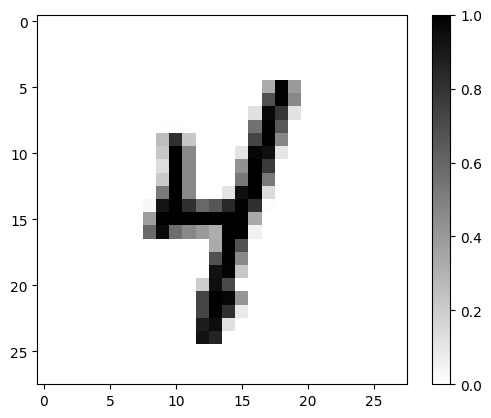

In [ ]:
 #Graficar una imagen para ver que todo esté en orden
for imagen, etiqueta in datos_entrenamiento.take(1):
    imagen = imagen.numpy().reshape((28, 28))

    plt.figure()
    plt.imshow(imagen, cmap=plt.cm.binary)
    plt.colorbar()
    plt.grid(False)
    plt.show()

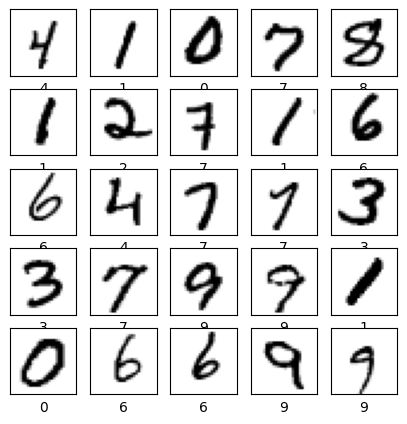

In [ ]:
# Graficar imágenes

plt.figure(figsize=(5, 5))
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
    imagen = imagen.numpy().reshape((28, 28))
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imagen, cmap=plt.cm.binary)
    plt.xlabel(nombre_clases[etiqueta.numpy()])
plt.show()

In [ ]:
#Crear el modelo de macine learning
modelo=tf.keras.Sequential([
    #Definir las capas que tendrá el modelo
    #Se utiliza Flatten para aplanar la matriz de 28 x 28
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    #Solo dos capas ocultas
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    #Capa de salida
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Definir los hiperparámetros
learning_rate=0.001
epochs=20
batch_size=32

In [ ]:
#compilar el modelo
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss=tf.keras.losses.SparseCategoricalCrossentropy,
    metrics=['accuracy']
)

In [ ]:
#Contabilizar los datos de entrenamiento y de test
numero_entrenamiento=metadatos.splits['train'].num_examples
numero_test=metadatos.splits['test'].num_examples
print(numero_entrenamiento)
print(numero_test)

60000
10000


In [ ]:
#Utiloizar una estrategia para que tome datos aleatorios por cada iteración
datos_entrenamiento=datos_entrenamiento.repeat().shuffle(numero_entrenamiento).batch(batch_size)
datos_test=datos_test.batch(batch_size)

In [ ]:
import math
#Entrenar el modelo
#Importar la función pasos por época
steps_por_epoca=math.ceil(numero_entrenamiento/batch_size)
print("Entrenando modelo")
hitorial=modelo.fit(datos_entrenamiento, epochs=epochs, steps_per_epoch=steps_por_epoca)
print("Modelo entrenado")

Entrenando modelo
Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.8723 - loss: 0.4418
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9642 - loss: 0.1238
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9747 - loss: 0.0828
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9811 - loss: 0.0611
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9850 - loss: 0.0486
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9887 - loss: 0.0370
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9908 - loss: 0.0287
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9931 - loss: 0.0239
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9934 - loss: 0.0216
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9947 - loss: 0.0166
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9957 - loss: 0.0141


In [ ]:
#Predecir las imagenes de prueba
for img_test, etiqueta_test in datos_test.take(1):
    img_test=img_test.numpy()
    etiqueta_test=etiqueta_test.numpy()
    predicciones=modelo.predict(img_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


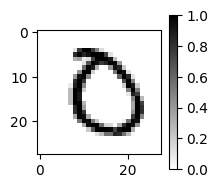

[[9.1975045e-01 9.9244117e-23 4.9733223e-10 8.1005379e-14 7.8649000e-19
  3.2108563e-08 8.0249488e-02 1.8233751e-10 4.1048422e-09 1.2414619e-14]]
Prediccion: 0


In [ ]:
import numpy as np
#Predecir la imagen que le demos
index_image =23 # 0 - 31
imagen=img_test[index_image]


#REalizar la predicción
imagen=np.array([imagen])
resultado_prediccion=modelo.predict(imagen)

#Graficae la imagen predecida
plt.figure(figsize=(2,2))
plt.imshow(img_test[index_image],cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

print(resultado_prediccion)
print(f"Prediccion: {nombre_clases[np.argmax(resultado_prediccion[0])]}")

In [ ]:
# Evaluar el modelo en los datos de prueba
loss, accuracy = modelo.evaluate(datos_test)

# Verificar si la precisión cumple con el 97%
if accuracy >= 0.97:
    print(f"Precisión aceptada mayor al 97%: {accuracy*100:.2f}%")
else:
    print(f"Precisión insuficiente, menor al 97%: {accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9777 - loss: 0.1012
Precisión aceptada mayor al 97%: 97.82%


#### El accuracy da 97.88%!! Mayor al 97%, así que este modelo es aceptado

## **Preguntas y respuestas**

*   Que pasa si quita neuronas a la capa oculta?
*   Qué pasa si agrega más de 3 capas ocultas con 60 neuronas?
*   Qué pasa con una capa oculta de 128 neuronas?

1.- Si quitamos neuronas de la capa oculta del modelo puede ser un arma de doble filo: podríamos mejorar el rendimiento o, podríamos empeorarlo

2.- Si agregamos más neuronas o lo mejoramos como dijimos en clase, podemos mejorar el modelo, pero tiene desventajas: tiende a ser más propenso al overfitting (qué es cuándo el modelo entrena de "más") además, tarda más entrenando y se vuelve más complejo visualizarlo

3.- El modelo tiene mayor nivel de procesamiento:  128, 256 o 512 neuronas son los estándares de los modelos




### **Servidor en la nube**
##### El profesor nos pidió que levantáramos un servidor en la nube para dejar listo este trabajo a una app web. Lo he dejado listo mediante Flask: con un tunel en ngrok, que crea una url pública en la red. Podemos conectarlo a javascript mediante esta url, apuntandolo a nuestro método que aquí se llama /predict. Voy a incluir el código del json que manda el servidor al estar funcionando en el navegador

In [ ]:
!pip install flask ngrok


In [ ]:
!pip install pyngrok


In [ ]:
#Las siguientes dos lineas son para hacer autenticación de mi usuario en gnrok. Para las versiones gratuitas solo puede ofrecer 3 túnles, así que
# es bueno tener cuidado, y no levantar tuneles de más
!ngrok authtoken 2vZ5fpT6WopUMJtHJpeVmh9X2JN_4wABygoLz27whY9ezmTbD

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!ngrok config add-authtoken 2vZ5fpT6WopUMJtHJpeVmh9X2JN_4wABygoLz27whY9ezmTbD

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
import threading

In [ ]:
!pip install flask-cors


In [ ]:
#Por eso no se deben levantar túneles de más, aquí tuve que tirarlos y en el dashborad de ngrok a la "fuerza"
!ngrok kill


ngrok - tunnel local ports to public URLs and inspect traffic

USAGE:
  ngrok [command] [flags]

COMMANDS: 
  config          update or migrate ngrok's configuration file
  http            start an HTTP tunnel
  tcp             start a TCP tunnel
  tunnel          start a tunnel for use with a tunnel-group backend

EXAMPLES: 
  ngrok http 80                                                 # secure public URL for port 80 web server
  ngrok http --url baz.ngrok.dev 8080                           # port 8080 available at baz.ngrok.dev
  ngrok tcp 22                                                  # tunnel arbitrary TCP traffic to port 22
  ngrok http 80 --oauth=google --oauth-allow-email=foo@foo.com  # secure your app with oauth

Paid Features: 
  ngrok http 80 --url mydomain.com                              # run ngrok with your own custom domain
  ngrok http 80 --cidr-allow 2600:8c00::a03c:91ee:fe69:9695/32  # run ngrok with IP policy restrictions
  Upgrade your account at https://dash

In [ ]:
from flask import Flask, jsonify
from flask_cors import CORS
from pyngrok import ngrok
import threading

app = Flask(__name__)
CORS(app)

@app.route("/predict", methods=["GET"])
def predict():
    return jsonify({"message": "Predicción de ejemplo"})

def run_app():
    app.run(port=5000)

public_url = ngrok.connect(5000)
print("Flask app disponible en:", public_url)

thread = threading.Thread(target=run_app)
thread.start()
#La aplicación está corriendo en el puerto 5000

In [ ]:
#Qué muestra el navegador para indicar que el puerto está funcionando?
#En la url https://1eff-34-125-12-235.ngrok-free.app/predict
#Muestra: {"message":"Predicci\u00f3n de ejemplo"}

## **En conclusión:**
#### El servidor ha sido creado y funciona. Es posible que en JavaScript (intenté hacer la página web, aunque no se especificara que se debía de realizar) el cors, nos muestre error. Solo es una medida de tipo seguridad para los navegadores. Puede resolverse cambiando los headers de el bloque anterior y modificando el javascript: Para que acepte peticiones de ips locales, con el puerto de live server, el mensaje es el siguiente:
https://1eff-34-125-12-235.ngrok-free.app/predict' from origin 'http://127.0.0.1:5500' has been blocked by CORS policy: Response to preflight request doesn't pass access control check: No 'Access-Control-Allow-Origin' header is present on the requested resource. If an opaque response serves your needs, set the request's mode to 'no-cors' to fetch the resource with CORS disabled.

Lo cual merece un tipo de solución distinta al objetivo de este colab, puede depender del fin que le queramos dar a la aplicación, ya que es una solución de configuración
